In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [10]:

df = pd.read_csv('./data/electricity-normalized.csv')
df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  int64  
 2   period     45312 non-null  float64
 3   nswprice   45312 non-null  float64
 4   nswdemand  45312 non-null  float64
 5   vicprice   45312 non-null  float64
 6   vicdemand  45312 non-null  float64
 7   transfer   45312 non-null  float64
 8   class      45312 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.1+ MB


In [12]:
numeric_columns = ['nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']

# Calculate descriptive statistics using pandas describe() function
statistics = df[numeric_columns].describe()

# Print the statistics
print(statistics)

           nswprice     nswdemand      vicprice     vicdemand      transfer
count  45312.000000  45312.000000  45312.000000  45312.000000  45312.000000
mean       0.057868      0.425418      0.003467      0.422915      0.500526
std        0.039991      0.163323      0.010213      0.120965      0.153373
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.035127      0.309134      0.002277      0.372346      0.414912
50%        0.048652      0.443693      0.003467      0.422915      0.414912
75%        0.074336      0.536001      0.003467      0.469252      0.605702
max        1.000000      1.000000      1.000000      1.000000      1.000000


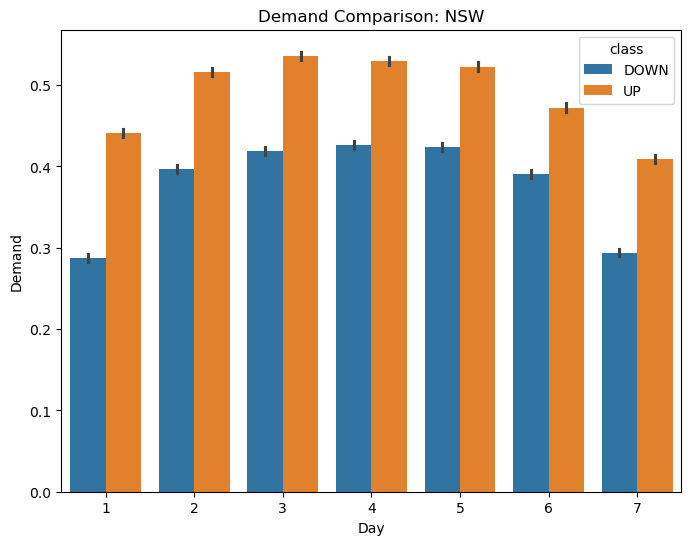

In [13]:
# Bar chart of demand for NSW and Victoria by day
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='day', y='nswdemand', hue='class')
plt.xlabel('Day')
plt.ylabel('Demand')
plt.title('Demand Comparison: NSW')
plt.show()

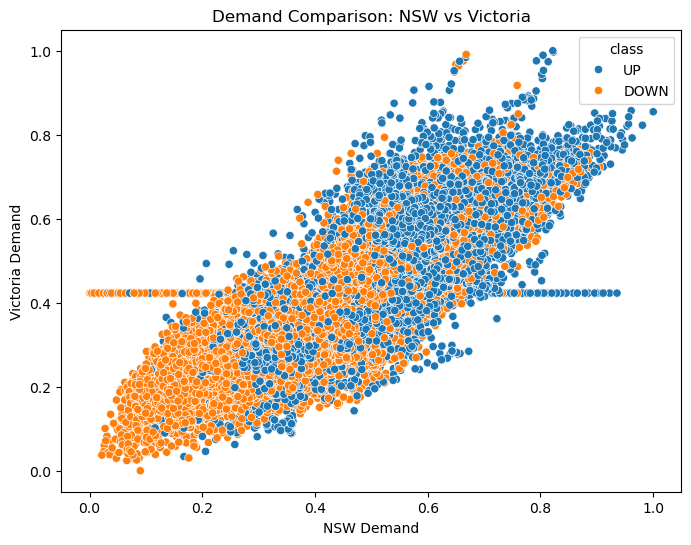

In [14]:
# Scatter plot of demand for NSW and Victoria
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='nswdemand', y='vicdemand', hue='class')
plt.xlabel('NSW Demand')
plt.ylabel('Victoria Demand')
plt.title('Demand Comparison: NSW vs Victoria')
plt.show()

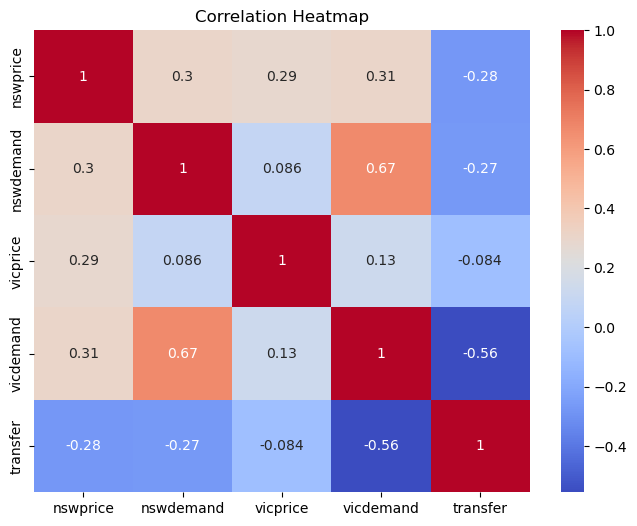

In [15]:
# Heatmap of correlation between numerical columns
plt.figure(figsize=(8, 6))
corr = df[['nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

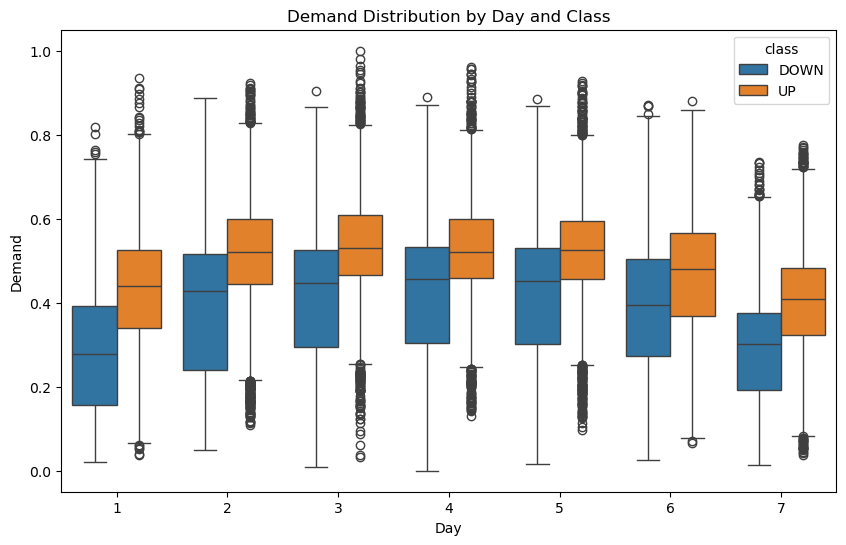

In [16]:
# Box plot of demand distribution by day and class
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='day', y='nswdemand', hue='class')
plt.xlabel('Day')
plt.ylabel('Demand')
plt.title('Demand Distribution by Day and Class')
plt.show()

In [18]:
# Assuming your dataframe is named 'df'
class_mapping = {'UP': 0, 'DOWN': 1}

# Map the class values using the mapping dictionary
df_ = df
df_['class'] = df['class'].map(class_mapping)
df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,0
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,0
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,0
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,0
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,1


In [19]:
X = df_.drop('class', axis=1)
y = df_['class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Define a list of classifiers to try
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    LogisticRegression()
]

# Define a dictionary to store the evaluation metrics
metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Log Loss': []
}

# Train and evaluate each classifier
for classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    loss = log_loss(y_test, y_pred)

    # Store the metrics in the dictionary
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-score'].append(f1)
    metrics['Log Loss'].append(loss)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics, index=[type(classifier).__name__ for classifier in classifiers])

In [22]:
metrics_df = pd.DataFrame(metrics_df)
metrics_df

,Accuracy,Precision,Recall,F1-score,Log Loss
DecisionTreeClassifier,0.882048,0.882101,0.882048,0.882073,4.251425
RandomForestClassifier,0.905109,0.905040,0.905109,0.904889,3.420230
SVC,0.741807,0.747119,0.741807,0.733221,9.306206
KNeighborsClassifier,0.807900,0.807262,0.807900,0.807288,6.923977
LogisticRegression,0.751186,0.756225,0.751186,0.743591,8.968160


In [23]:
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-score': [f1],
})

# Print the metrics table
print(metrics_df)

   Accuracy  Precision    Recall  F1-score
0  0.914156    0.91406  0.914156  0.914059
